<a href="https://colab.research.google.com/github/rrl7012005/Tensor-Flow-Computer-Vision-Course/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf### models
import pandas as pd ### reading and processing data
import seaborn as sns ### visualization
import numpy as np### math computations
import matplotlib.pyplot as plt### plotting bar chart
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

#Data Preparation

**Pandas Library**

In [ ]:
data = pd.read_csv("/train.csv",sep=",")
#csv means comma separated values (specifically if open file with notepad)
#so specify , as the separator
#if had semi colons then thats the separator

data.head() #will give the first few rows of data

# data.shape #gives shape

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


**Seaborn Library**

Helpful to visualize lots of statistical data
https://seaborn.pydata.org/

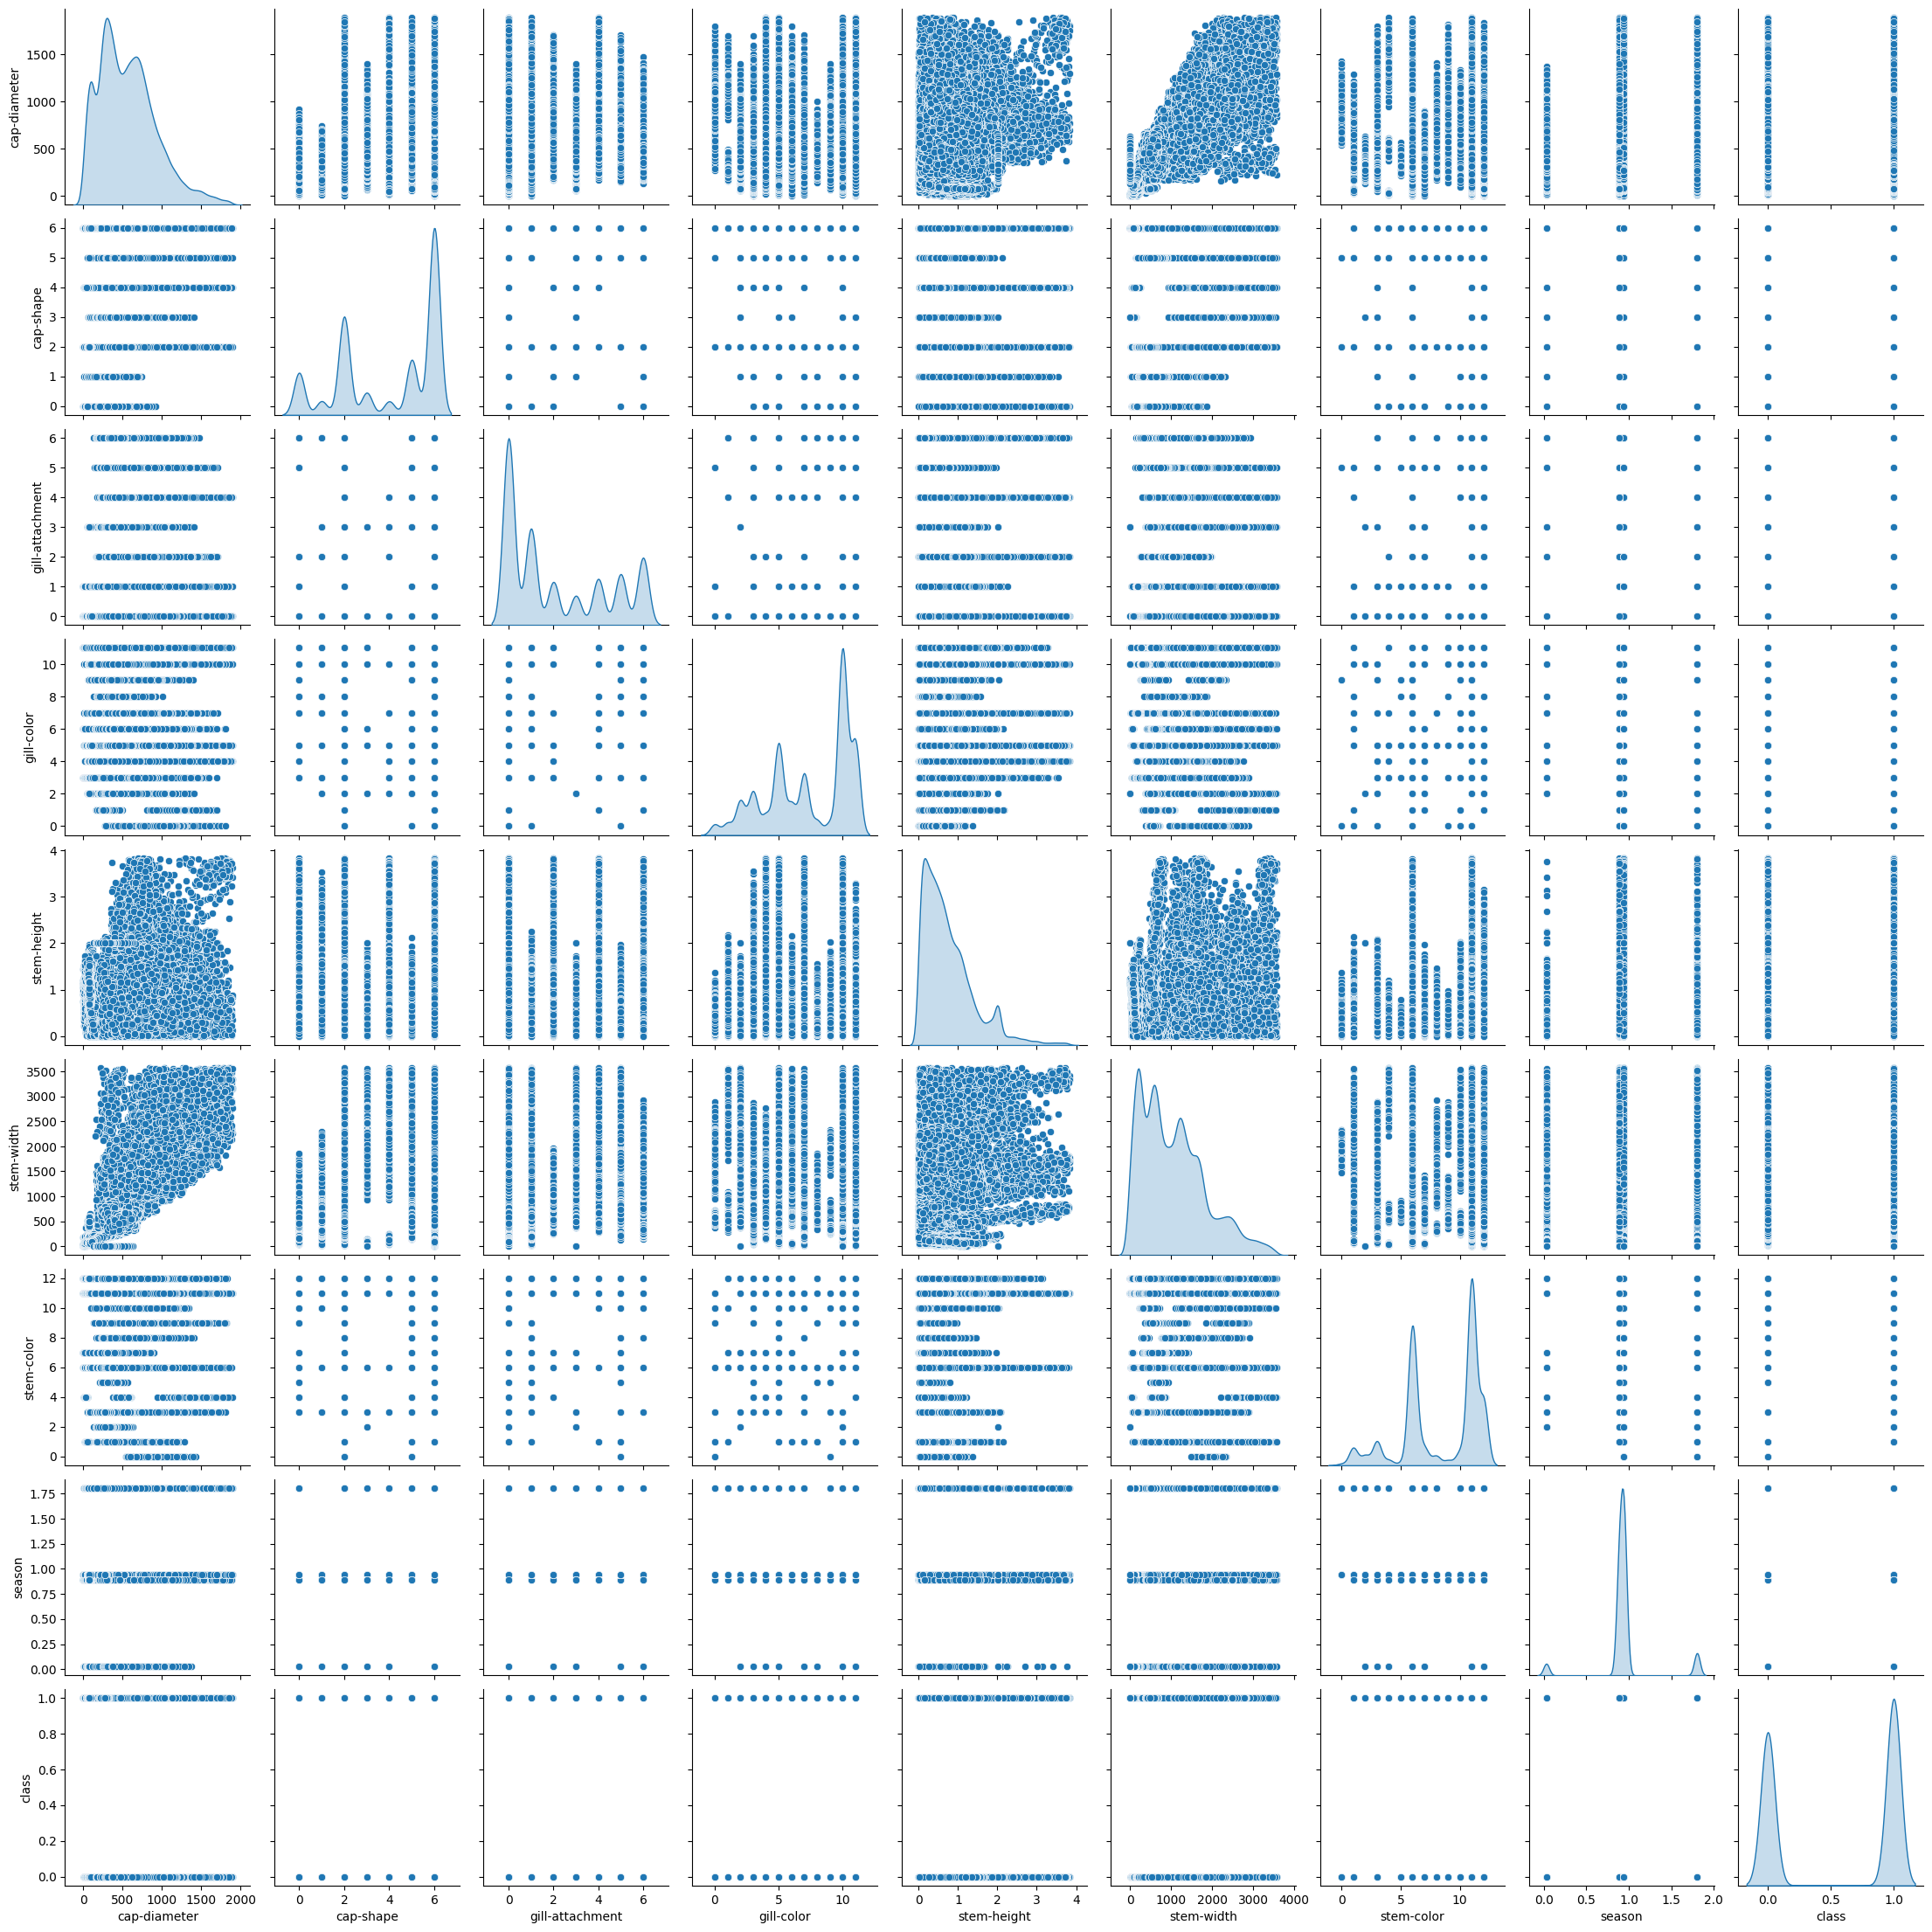

In [ ]:
sns.pairplot(data[['years',	'km',	'rating',	'condition',	'economy',	'top speed',	'hp',	'torque',	'current price']], diag_kind='kde')

The above representation shows how every feature is related to every other feature. A kde plot puts how each feature is related to itself on the diagonal. So its easy to see all the relationships. You can see how each of the factors affect the current price at the bottom.

Now convert the data to a tensor

In [ ]:
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data, dtype=tf.float32)
print(tensor_data)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


We should randomly shuffle the data so theres no bias in the order it was collected

In [ ]:
tensor_data = tf.random.shuffle(tensor_data)
#Just shuffles the outer dimension
print(tensor_data)

tf.Tensor(
[[9.670000e+02 5.695760e+05 8.018800e+05 ... 7.100000e+01 8.000000e+01
  3.010815e+05]
 [8.130000e+02 5.879750e+05 7.080520e+05 ... 9.400000e+01 1.140000e+02
  3.079930e+05]
 [1.730000e+02 5.493260e+05 7.843190e+05 ... 1.130000e+02 1.150000e+02
  2.194625e+05]
 ...
 [4.980000e+02 5.534940e+05 8.354280e+05 ... 9.500000e+01 1.160000e+02
  2.403535e+05]
 [8.260000e+02 5.061150e+05 7.850620e+05 ... 7.700000e+01 7.000000e+01
  5.347050e+04]
 [1.800000e+01 5.835600e+05 8.824260e+05 ... 6.900000e+01 9.300000e+01
  2.743575e+05]], shape=(1000, 12), dtype=float32)


We are interested in obtaining all the rows of data but not interested in the first few columns so we take the data as follows. Also we're only interested in the input so dont pick the last column. DO a similar thing for the output

In [ ]:
input = tensor_data[:, 3:-1]
print(input.shape)

output = tensor_data[:, -1]
print(output.shape)

#However the above produces a 1D tensor so use expand_dims to make it 2D

output = tf.expand_dims(output, -1)
print(output.shape)

(1000, 8)
(1000,)
(1000, 1)


Normalizing the input data improves the convergence for ML models, ensures features are on a similar scale to prevent one variable from dominating the others. So we should normalize the training data by taking away the mean and dividing by standard deviation.

In Tensor Flow you can use
tf.keras.layers.Normalization(axis, mean, variance) to normalize inputs. More details in the modeling section. Normalization is a layer.

In [ ]:
#You imported the class so you can just do this to call the function

normalizer = Normalization(mean=5, variance=4)
x_normalized = tf.constant([[2, 3, 0, -1, 7, 4],
                           [1, 2, 1, 4, -1, -3]])
normalizer(x_normalized)

<tf.Tensor: shape=(2, 6), dtype=float32, numpy=
array([[-1.5, -1. , -2.5, -3. ,  1. , -0.5],
       [-2. , -1.5, -2. , -0.5, -3. , -4. ]], dtype=float32)>

Not everytime will we know the mean and variance. The normalizer.adapt function automatically calculates the mean and variance along the specified axis and adapts the normalization to each axis.

axis = -1 defaults to the columns so for each column, it finds the mean and stddev and normalizes that column according to that.

Here the Normalization class input has to be empty this is how you use it.

In [ ]:
normalizer = Normalization()
y_normalized = tf.constant([[2, 3, 0, -1, 7, 4],
                           [1, 2, 1, 4, -1, -3]])

normalizer.adapt(y_normalized)
normalizer(y_normalized)

<tf.Tensor: shape=(2, 6), dtype=float32, numpy=
array([[ 1.,  1., -1., -1.,  1.,  1.],
       [-1., -1.,  1.,  1., -1., -1.]], dtype=float32)>

# Modeling

We are using a linear regression model. This means given our input tensor X, we are trying to find m and c such that our output tensor is Y=mX + c. Machine learning will attempt to optimize such a problem.

m is like the weight and c the bias.

The model should embody the data set. Each neural network has a different model and the model type would employ the strategy.

In [ ]:
#T (from below, testing)

TRAIN_RATIO = 0.8 #% of datapoints you want for training
VAL_RATIO = 0.1 #% of datapoints for validation (testing during training)
TEST_RATIO = 0.1 #% of datapoints for testing (after training)

input_train = input[:int(len(input) * TRAIN_RATIO)]
output_train = output[:int(len(output) * TRAIN_RATIO)] #Create our training data

print(input_train.shape, output_train.shape)

input_val = input[int(len(input) * TRAIN_RATIO):int(len(input) * (TRAIN_RATIO + VAL_RATIO))]
output_val = output[int(len(output) * TRAIN_RATIO):int(len(input) * (TRAIN_RATIO + VAL_RATIO))] #Create our validation data

print(input_val.shape, output_val.shape)

input_test = input[int(len(input) * (TRAIN_RATIO + VAL_RATIO)): int(len(input) * (TRAIN_RATIO + VAL_RATIO + TEST_RATIO))]
output_test = output[int(len(input) * (TRAIN_RATIO + VAL_RATIO)): int(len(input) * (TRAIN_RATIO + VAL_RATIO + TEST_RATIO))]

print(input_test.shape, output_test.shape)

#T

(800, 8) (800, 1)
(100, 8) (100, 1)
(100, 8) (100, 1)


In [ ]:
normalizer = Normalization()
normalizer.adapt(input_train) #T when normalizing only use training so info doesn't leak over into test
normalizer(input_train)

<tf.Tensor: shape=(800, 8), dtype=float32, numpy=
array([[-1.4622287 , -0.11212361,  0.717972  , ..., -1.0231892 ,
        -0.64877355, -1.1013024 ],
       [-0.88169104, -0.49111563,  1.4244633 , ..., -1.0231892 ,
         0.46969694,  0.51372063],
       [ 0.27938417,  0.40822238,  0.717972  , ..., -1.5888779 ,
         1.3936508 ,  0.5612213 ],
       ...,
       [-0.30115342, -1.6539735 ,  1.4244633 , ..., -0.9717629 ,
         0.56695527, -1.5763091 ],
       [ 0.85992175, -1.0331556 ,  0.717972  , ...,  0.15961474,
         0.37243864, -1.5763091 ],
       [ 1.4404594 , -0.952936  ,  1.4244633 , ..., -0.35464782,
        -0.6001444 ,  0.9412267 ]], dtype=float32)>

The input into the model has to be the instance of a class (normalizer) not the variable name for the input.

Models in tensorflow are usually created via:

1. Sequential API
2. Functional API
3. Subclassing Method

In tf the models are built in so you dont have to code them from scratch.

Sequential is useful for producing a linear stack of layers onto the keras model.

The model is made up of the normalization layer and the dense layer. The dense layer just takes the input multiplies by the weight and adds a bias.

Here we have many variables all of them go into the dense layer. For each of the inputs they have their own assosciated 'm' weight.

So the output will be m1*x1 + m2*x2 + ... + mn*xn + C. Note the bias is not for each connection of neurons but each neuron in the next layer has its own bias. The weights are the weights of each connection but the bias represents the activation energy of the neuron in the next layer so if we have 8 input neurons feeding into one neuron then one bias, which exists for that neuron because of its activation energy.

The dense has 1 in the bracket because we only want 1 output. If we wanted 2 then we would put 2.

So we are training a 1 layer network (input directly to one output neurone) (no hidden layers)

Its just an optimization problem so ML is essentially calculus with numerical methods to approximate behavior.

In [ ]:
#Can define like this
model0 = tf.keras.Sequential([
                            normalizer,
                            Dense(1)
])
model0.summary()

#or like this

model = tf.keras.Sequential()
model.add(normalizer)
model.add(Dense(1)) #1 dense layer
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normaliza  (None, 8)                 17        
 tion)                                                           
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 26 (108.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 17 (72.00 Byte)
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normaliza  (None, 8)                 17        
 tion)                                                           
                                                              

The non-trainable params above come from our normalization data, which we dont need to modify anymore. To plot the model do the following:

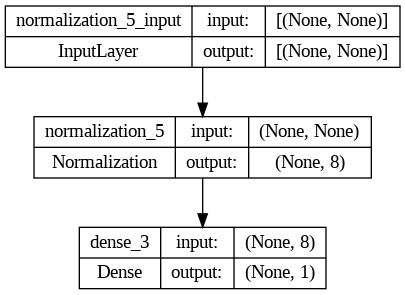

In [ ]:
tf.keras.utils.plot_model(model, to_file = "model.png", show_shapes=True)

Now we need to determine data batch size. Generally, we dont use the entire dataset at once into model because we're limited by memory. So pass our data in batches. Generally you dont want a batch size too large, typically use 32 or lower.

The None in the diagram above is our batch dimension which we havent specified.

We can do this in the declaration

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normaliza  (None, 8)                 17        
 tion)                                                           
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 26 (108.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 17 (72.00 Byte)
_________________________________________________________________


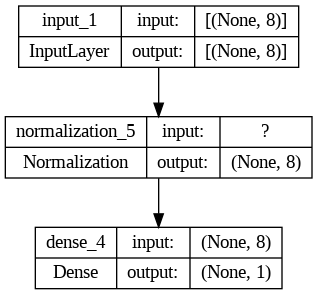

In [ ]:
model = tf.keras.Sequential([
                            InputLayer(input_shape = (8, )), #If we dont know batch size we can just put the 8
                            normalizer,
                            Dense(1)
])
model.summary()

tf.keras.utils.plot_model(model, to_file = "model.png", show_shapes=True)

# Error sanctioning


If we run the model on our training data then the error is between the model value and the actual value. The higher the error, the more we should adjust the model, the lower the error the less we need to sanction it. Use least square for each point and find the average of all those squared error (mean squared function). Its already in tensorflow. In the keras section and losses. Goal is to minimize loss function, in this case mean squared error. AFterwards we usually measure performance, and if not good then change the loss function.

In [ ]:
model.compile(loss = MeanSquaredError()) #When we compile the model, it will use this function to error sanction
#Can also use absolute value instead
model.compile(optimizer = Adam(learning_rate = 1), loss = MeanAbsoluteError(), metrics = RootMeanSquaredError())

If have outliers, may not want to use least squares as weight will be large on those outliers, so then use absolute errors.

So best to combine them, when have outlier, use absolute error, when have normal point use mean squared. Measured by a threshold we set. called huber function.
tf.keras.losses.huber(
    y_true, y_pred, delta=1.0
)

In [ ]:
model.compile(loss = Huber())

# Training

Use Stochastic Gradient Descent. Stochastic Gradient Descent: Faster convergence rate due to the use of single training examples in each iteration. Gradient Descent: Slower convergence rate, as it uses the entire dataset for each iteration. But since the gradient it's not computed for the entire dataset, and only for one random point on each iteration, the updates have a higher variance. Randomly initialize the weights.

Weight vector -= learning rate * derivative of loss function with respect to the weight vector. Do the same for the bias. Learning rate is usually 0.001, 0.01 or 0.1.

Now compute new error with our new weights and bias. w^T * x + c. Will always have some loss as straight line can only fit datapoints so well. Thats the basic idea behind neural network.

Once we reach a point where the loss doesn't change anymore then we reach convergence.


In [ ]:
#epochs is the number of times we gradient descent
#verbose is something we set to see the process/outputs
history = model.fit(input_train, output_train, validation_data = (input_val, output_val), epochs = 100, verbose = 1)
#T changed input and output to train and validation_data and speed is used (fraction of training data to use as validation,but we already did that) #T

Epoch 1/100
25/25 [==============================] - 1s 10ms/step - loss: 311895.8125 - root_mean_squared_error: 336092.0938 - val_loss: 286482.9688 - val_root_mean_squared_error: 311716.2812
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 311870.3125 - root_mean_squared_error: 336068.6250 - val_loss: 286457.8750 - val_root_mean_squared_error: 311692.0000
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 311845.3438 - root_mean_squared_error: 336044.7812 - val_loss: 286432.9688 - val_root_mean_squared_error: 311669.0000
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 311820.1875 - root_mean_squared_error: 336021.7188 - val_loss: 286407.3125 - val_root_mean_squared_error: 311646.1562
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 311795.1875 - root_mean_squared_error: 335998.5625 - val_loss: 286382.6250 - val_root_mean_squared_error: 311623.1875
Epoch 6/100
25/25 [=========================

The model section in the tf library has some functions. The compile function, model.compile has an optimizer argument. These optimizers help us train our data. The most commonly used optimizer is the Adam optimizer.

tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name='Adam',
    **kwargs
)

epsilon prevents division by 0, beta_1 and beta_2 are statistical parameters, the closer to 1 means better. (called the exponential decay rate for the first and second moment estimates respectively)

SO now lets modify our model to include adam optimizer.

Plot the losses.

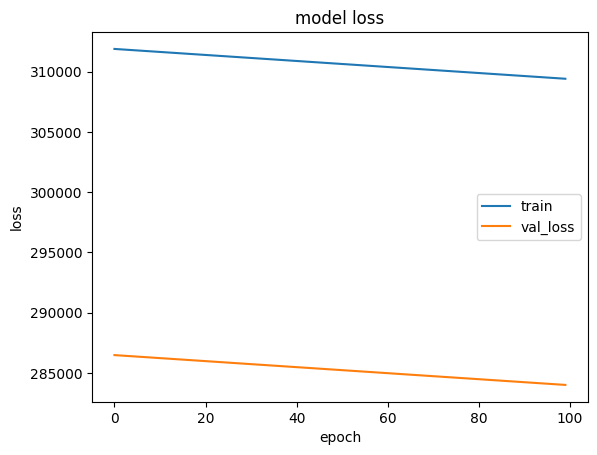

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'])
plt.show()

In [ ]:
history.history

{'loss': [311895.8125,
  311870.3125,
  311845.34375,
  311820.1875,
  311795.1875,
  311770.28125,
  311745.46875,
  311720.25,
  311695.34375,
  311670.3125,
  311645.25,
  311620.125,
  311595.1875,
  311570.1875,
  311545.25,
  311520.375,
  311495.21875,
  311470.21875,
  311445.28125,
  311420.1875,
  311395.3125,
  311370.15625,
  311345.34375,
  311320.1875,
  311295.1875,
  311270.21875,
  311245.3125,
  311220.40625,
  311195.25,
  311170.375,
  311145.15625,
  311120.1875,
  311095.375,
  311070.125,
  311045.28125,
  311020.34375,
  310995.3125,
  310970.375,
  310945.25,
  310920.3125,
  310895.28125,
  310870.375,
  310845.3125,
  310820.25,
  310795.28125,
  310770.28125,
  310745.25,
  310720.1875,
  310695.125,
  310670.25,
  310645.125,
  310620.40625,
  310595.375,
  310570.15625,
  310545.46875,
  310520.1875,
  310495.25,
  310470.1875,
  310445.34375,
  310420.125,
  310395.3125,
  310370.125,
  310345.1875,
  310320.375,
  310295.25,
  310270.21875,
  310245.1875

Its dropping quite low at LR = 0.001 so now pick LR = 1

# Performance Measurement, Validation, Testing

Measure the performance of this function to the past data. Helpful if you have multiple models to decide which is better. Use root mean square against the error. One way to do this is to include

metrics = RootMeanSquaredError() inside the compile function

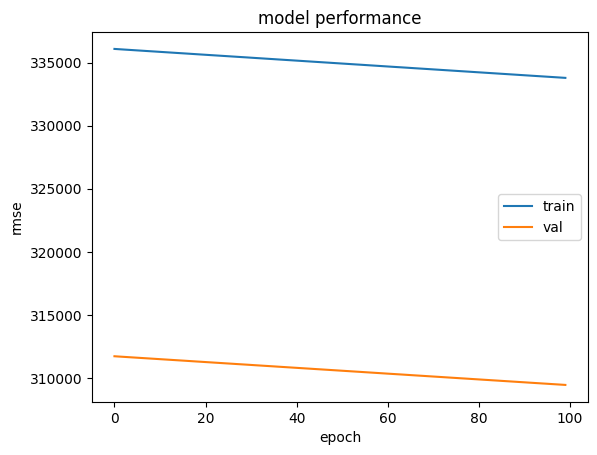

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model performance')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

can also do model.evaluate(input, output)

In [ ]:
model.evaluate(input_test, output_test) #evaluating on our test

4/4 [==============================] - 0s 3ms/step - loss: 300913.4062 - root_mean_squared_error: 328966.4688


[300913.40625, 328966.46875]

NOW Lets test the model against the training data and new data and see how it performs. If you have 1000 datapoints, train on 800 and test on 200 which the model has never seen so no bias in our testing. A model is bad if it does well on data it has seen but not on data it hasn't seen.

BUT Sometimes you dont want to wait for the model to finish training and then test it on new data. Waste time. You want to do while you're training. So build our validation sets.

I will overwrite it in between the above code, commenting the parts out so I know its an addition.

We will use #T as our brackets and surround this code above.

In [ ]:
print("hELLO")

hELLO


**TESTING ON NEW DATA AND MAKING PREDICTIONS**

In [ ]:
print(input_test.shape)

model.predict(input_test[0]) #if shapes dont match, use expand_dims



(100, 8)
1/1 [==============================] - 0s 111ms/step


array([[2505.0676]], dtype=float32)

In [ ]:
output_test[0]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([243097.], dtype=float32)>

Plot bar chart of predicted and true values side by side

In [ ]:
output_pred = list(model.predict(input_test)[:,0])
print(output_pred)

output_true = list(output_test[:,0].numpy())

4/4 [==============================] - 0s 3ms/step
[2505.0676, 2514.291, 2510.5679, 2501.7483, 2499.9167, 2499.4087, 2502.2207, 2488.6528, 2493.4321, 2500.7095, 2509.777, 2514.4656, 2508.7817, 2497.0574, 2509.9302, 2489.4724, 2505.5461, 2499.88, 2518.3752, 2503.583, 2509.9534, 2498.4644, 2483.6191, 2499.802, 2514.716, 2501.3577, 2505.0264, 2505.1228, 2507.3108, 2519.604, 2497.6458, 2510.2703, 2490.6855, 2517.378, 2509.9106, 2506.4912, 2502.4304, 2503.5078, 2508.307, 2501.3853, 2511.1033, 2495.191, 2502.4148, 2495.013, 2496.38, 2496.9392, 2503.082, 2491.42, 2505.014, 2494.0042, 2504.965, 2487.175, 2507.776, 2512.9827, 2507.9814, 2495.6204, 2492.3672, 2510.7498, 2505.1987, 2509.1619, 2486.6199, 2499.7437, 2497.714, 2507.206, 2502.0674, 2499.1704, 2498.5293, 2494.3103, 2523.7444, 2494.7798, 2506.1099, 2488.416, 2518.4932, 2517.4343, 2515.5889, 2515.0732, 2507.463, 2498.3455, 2499.2644, 2504.01, 2496.9863, 2514.1057, 2495.6301, 2497.465, 2510.7537, 2492.185, 2501.6245, 2502.4675, 2501.7637

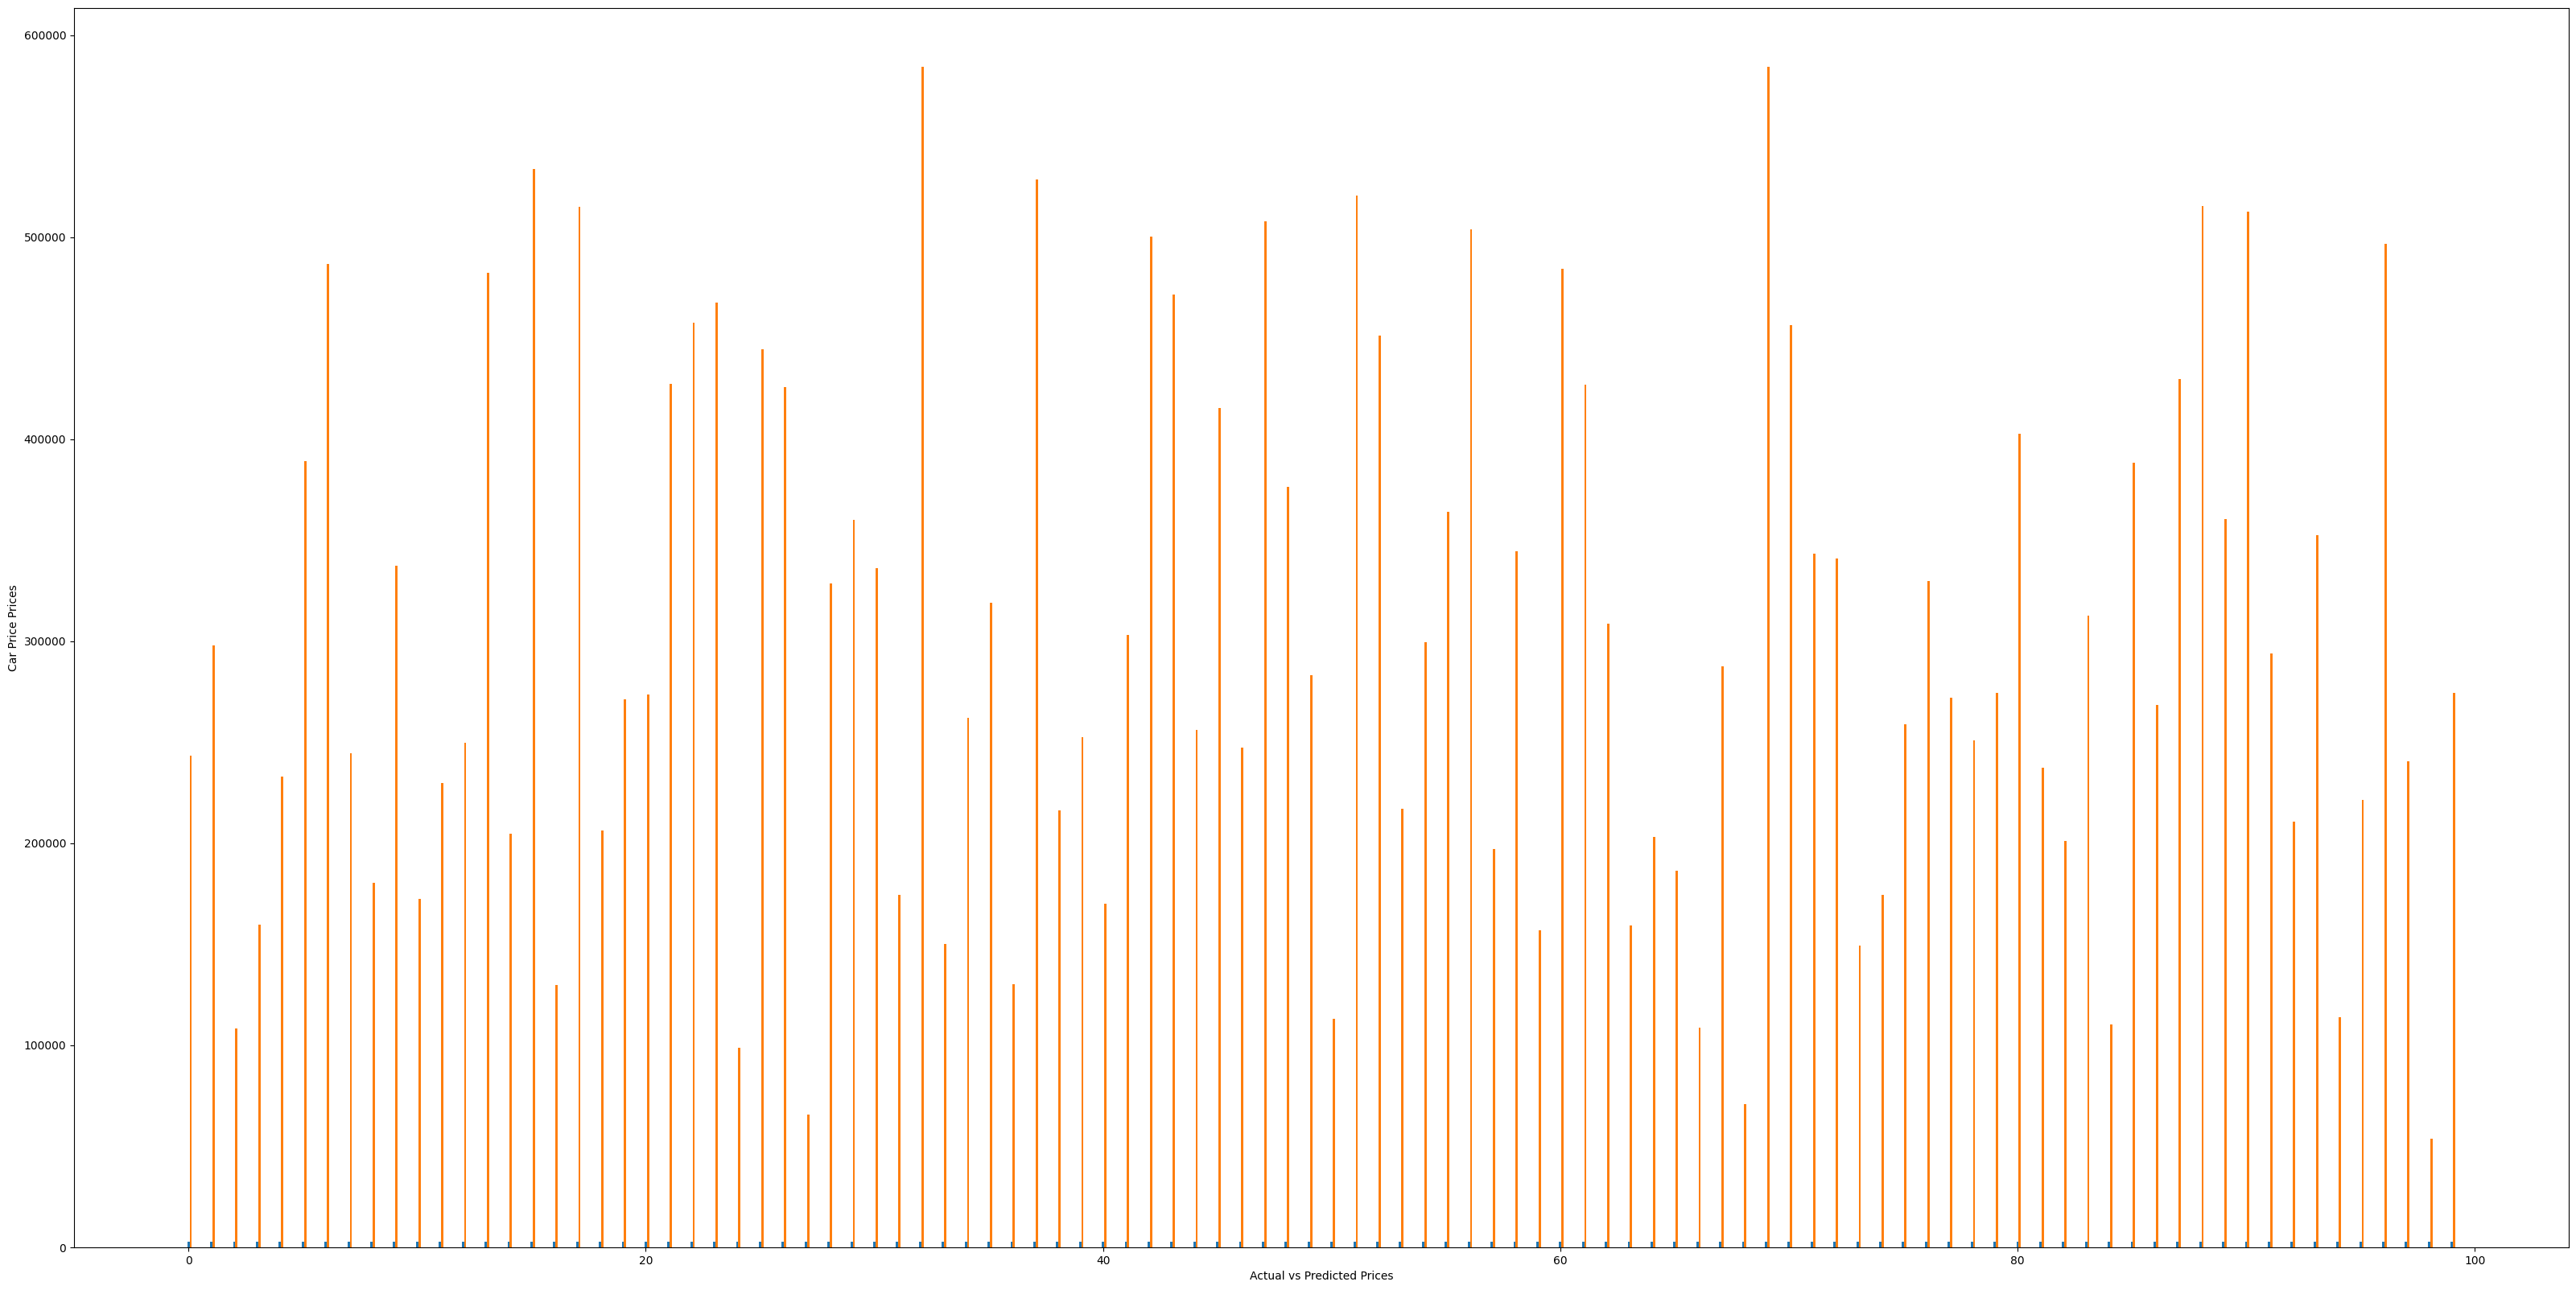

In [ ]:
ind = np.arange(100)
plt.figure(figsize=(40,20))
width = 0.1

plt.bar(ind, output_pred, width, label='Predicted Car Price')
plt.bar(ind + width, output_true, width, label='Actual Car Price')
plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Price Prices')
plt.show()

#Corrective Measures

Clearly model is performing very poorly.

Model is underfeeded if even after more epochs, the loss doesn't cross a certain threshold (bounded below).

So lets reduce this error by making model more complex.

Right now we have an input layer and 1 neuron output.

How about we add hidden layers or modify activation function.

At each neuron will have the activation function value.

The more parameters there are, the more likely the model will be accurate.

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normaliza  (None, 8)                 17        
 tion)                                                           
                                                                 
 dense_5 (Dense)             (None, 64)                576       
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dense_7 (Dense)             (None, 256)               33024     
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                      

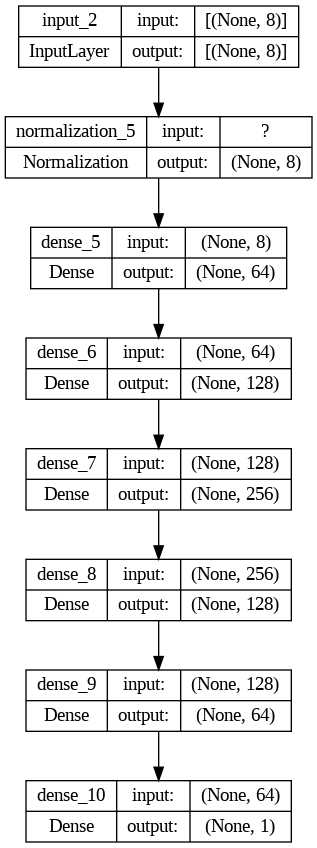

In [ ]:
model = tf.keras.Sequential([
                            InputLayer(input_shape = (8,)),
                            normalizer,
                            Dense(64, activation = "relu"),
                            Dense(128, activation = "relu"),
                            Dense(256, activation = "relu"),
                            Dense(128, activation = "relu"),
                            Dense(64, activation = "relu"),
                            Dense(1) #Output always needs 1 and no activation so dont interfere with our model
])

#Now create a new model with this

model.summary()

tf.keras.utils.plot_model(model, to_file = "model.png", show_shapes=True)

In [ ]:
model.compile(loss = MeanSquaredError()) #When we compile the model, it will use this function to error sanction
#Can also use absolute value instead
model.compile(optimizer = Adam(learning_rate = 0.01), loss = MeanAbsoluteError(), metrics = RootMeanSquaredError())

In [ ]:
history = model.fit(input_train, output_train, validation_data = (input_val, output_val), epochs = 100, verbose = 1)

Epoch 1/100
25/25 [==============================] - 1s 12ms/step - loss: 236440.6250 - root_mean_squared_error: 275036.8125 - val_loss: 78742.2734 - val_root_mean_squared_error: 98019.5469
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 61026.7852 - root_mean_squared_error: 76486.8203 - val_loss: 46774.6914 - val_root_mean_squared_error: 56335.1406
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 47628.3438 - root_mean_squared_error: 59326.9727 - val_loss: 42709.3711 - val_root_mean_squared_error: 54986.5078
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 42277.6641 - root_mean_squared_error: 52389.5742 - val_loss: 43092.9844 - val_root_mean_squared_error: 53021.1680
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 41911.2656 - root_mean_squared_error: 52716.3203 - val_loss: 48560.4609 - val_root_mean_squared_error: 59407.0703
Epoch 6/100
25/25 [==============================] - 0s 5ms/st

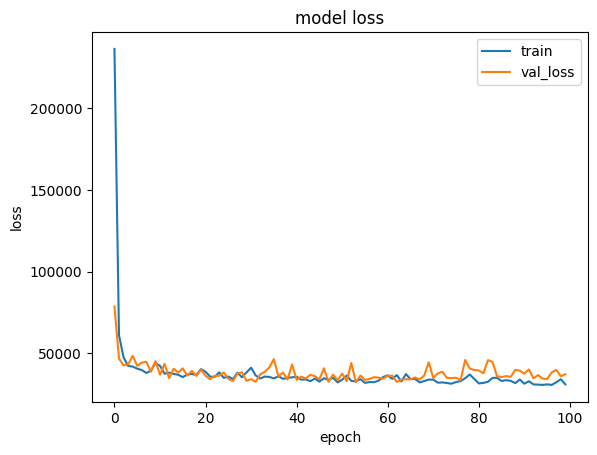

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'])
plt.show()

In [ ]:
history.history

{'loss': [236440.625,
  61026.78515625,
  47628.34375,
  42277.6640625,
  41911.265625,
  40631.17578125,
  39753.26171875,
  38005.015625,
  39335.76953125,
  44035.91015625,
  42355.64453125,
  37526.265625,
  38236.03125,
  37358.55078125,
  36883.57421875,
  35453.69921875,
  37071.1875,
  37360.2109375,
  36762.15234375,
  40323.7109375,
  38749.93359375,
  35787.109375,
  35524.25,
  38389.4375,
  34994.0390625,
  35813.00390625,
  34229.21484375,
  38124.640625,
  35372.453125,
  38335.64453125,
  41220.109375,
  36507.84375,
  34584.1484375,
  35777.35546875,
  35584.421875,
  34648.203125,
  35970.12109375,
  34407.12109375,
  35009.2265625,
  35324.7109375,
  35682.0859375,
  33896.59765625,
  34048.17578125,
  32950.6484375,
  34594.74609375,
  32682.552734375,
  34780.55859375,
  33717.328125,
  35035.18359375,
  32214.27734375,
  33909.890625,
  36362.37109375,
  33149.3125,
  32831.125,
  34186.21484375,
  31917.1328125,
  32405.216796875,
  32328.962890625,
  33268.64062

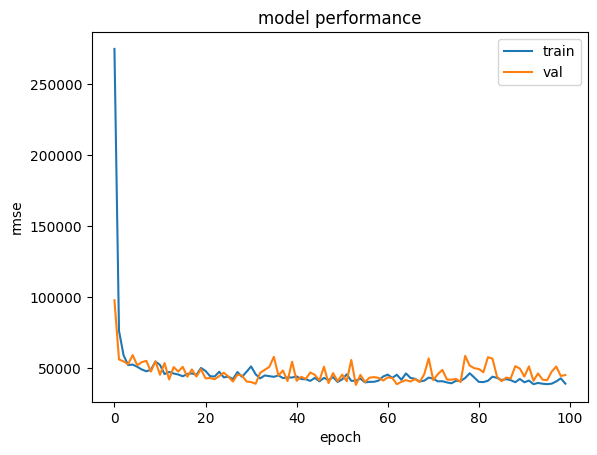

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model performance')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

#Expect for validation loss to be higher than training loss as it was trained on training data and havent seen validation
#If mismatch called over feeding.

In [ ]:
model.evaluate(input_test, output_test)

4/4 [==============================] - 0s 4ms/step - loss: 34930.4609 - root_mean_squared_error: 43372.6914


[34930.4609375, 43372.69140625]

In [ ]:
model.predict(input_test[0])

1/1 [==============================] - 0s 84ms/step


array([[177625.77]], dtype=float32)

In [ ]:
output_test[0]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([243097.], dtype=float32)>

In [ ]:
output_pred = list(model.predict(input_test)[:,0])
print(output_pred)

output_true = list(output_test[:,0].numpy())

4/4 [==============================] - 0s 3ms/step
[177625.75, 284479.84, 51459.816, 190092.34, 258537.4, 369247.6, 416225.1, 315469.94, 185821.84, 317001.7, 104190.516, 227921.0, 278836.94, 421943.88, 155179.97, 519551.88, 161386.34, 448275.62, 154700.97, 297646.7, 270060.38, 418987.22, 452002.94, 388546.2, 80323.37, 379735.44, 421635.2, 69963.99, 356882.12, 336107.94, 383276.12, 150178.5, 529198.56, 133291.56, 267873.34, 364851.75, 129766.49, 500765.38, 284106.7, 250433.0, 122814.18, 294869.06, 427050.2, 402389.6, 289082.78, 400143.62, 262057.88, 470943.8, 408291.44, 253891.98, 159560.73, 535430.1, 473300.88, 236061.73, 254552.8, 400948.5, 484588.9, 158225.9, 312727.28, 162059.3, 513033.56, 426944.5, 311899.3, 183036.16, 227669.4, 198251.56, 201368.2, 349716.8, 110064.12, 560477.5, 366803.62, 287809.44, 315345.88, 180417.64, 104612.77, 184425.55, 336064.9, 160819.69, 223027.56, 192862.75, 373245.72, 307198.25, 243808.31, 297750.62, 120322.74, 409407.94, 189435.39, 439456.53, 515285.1

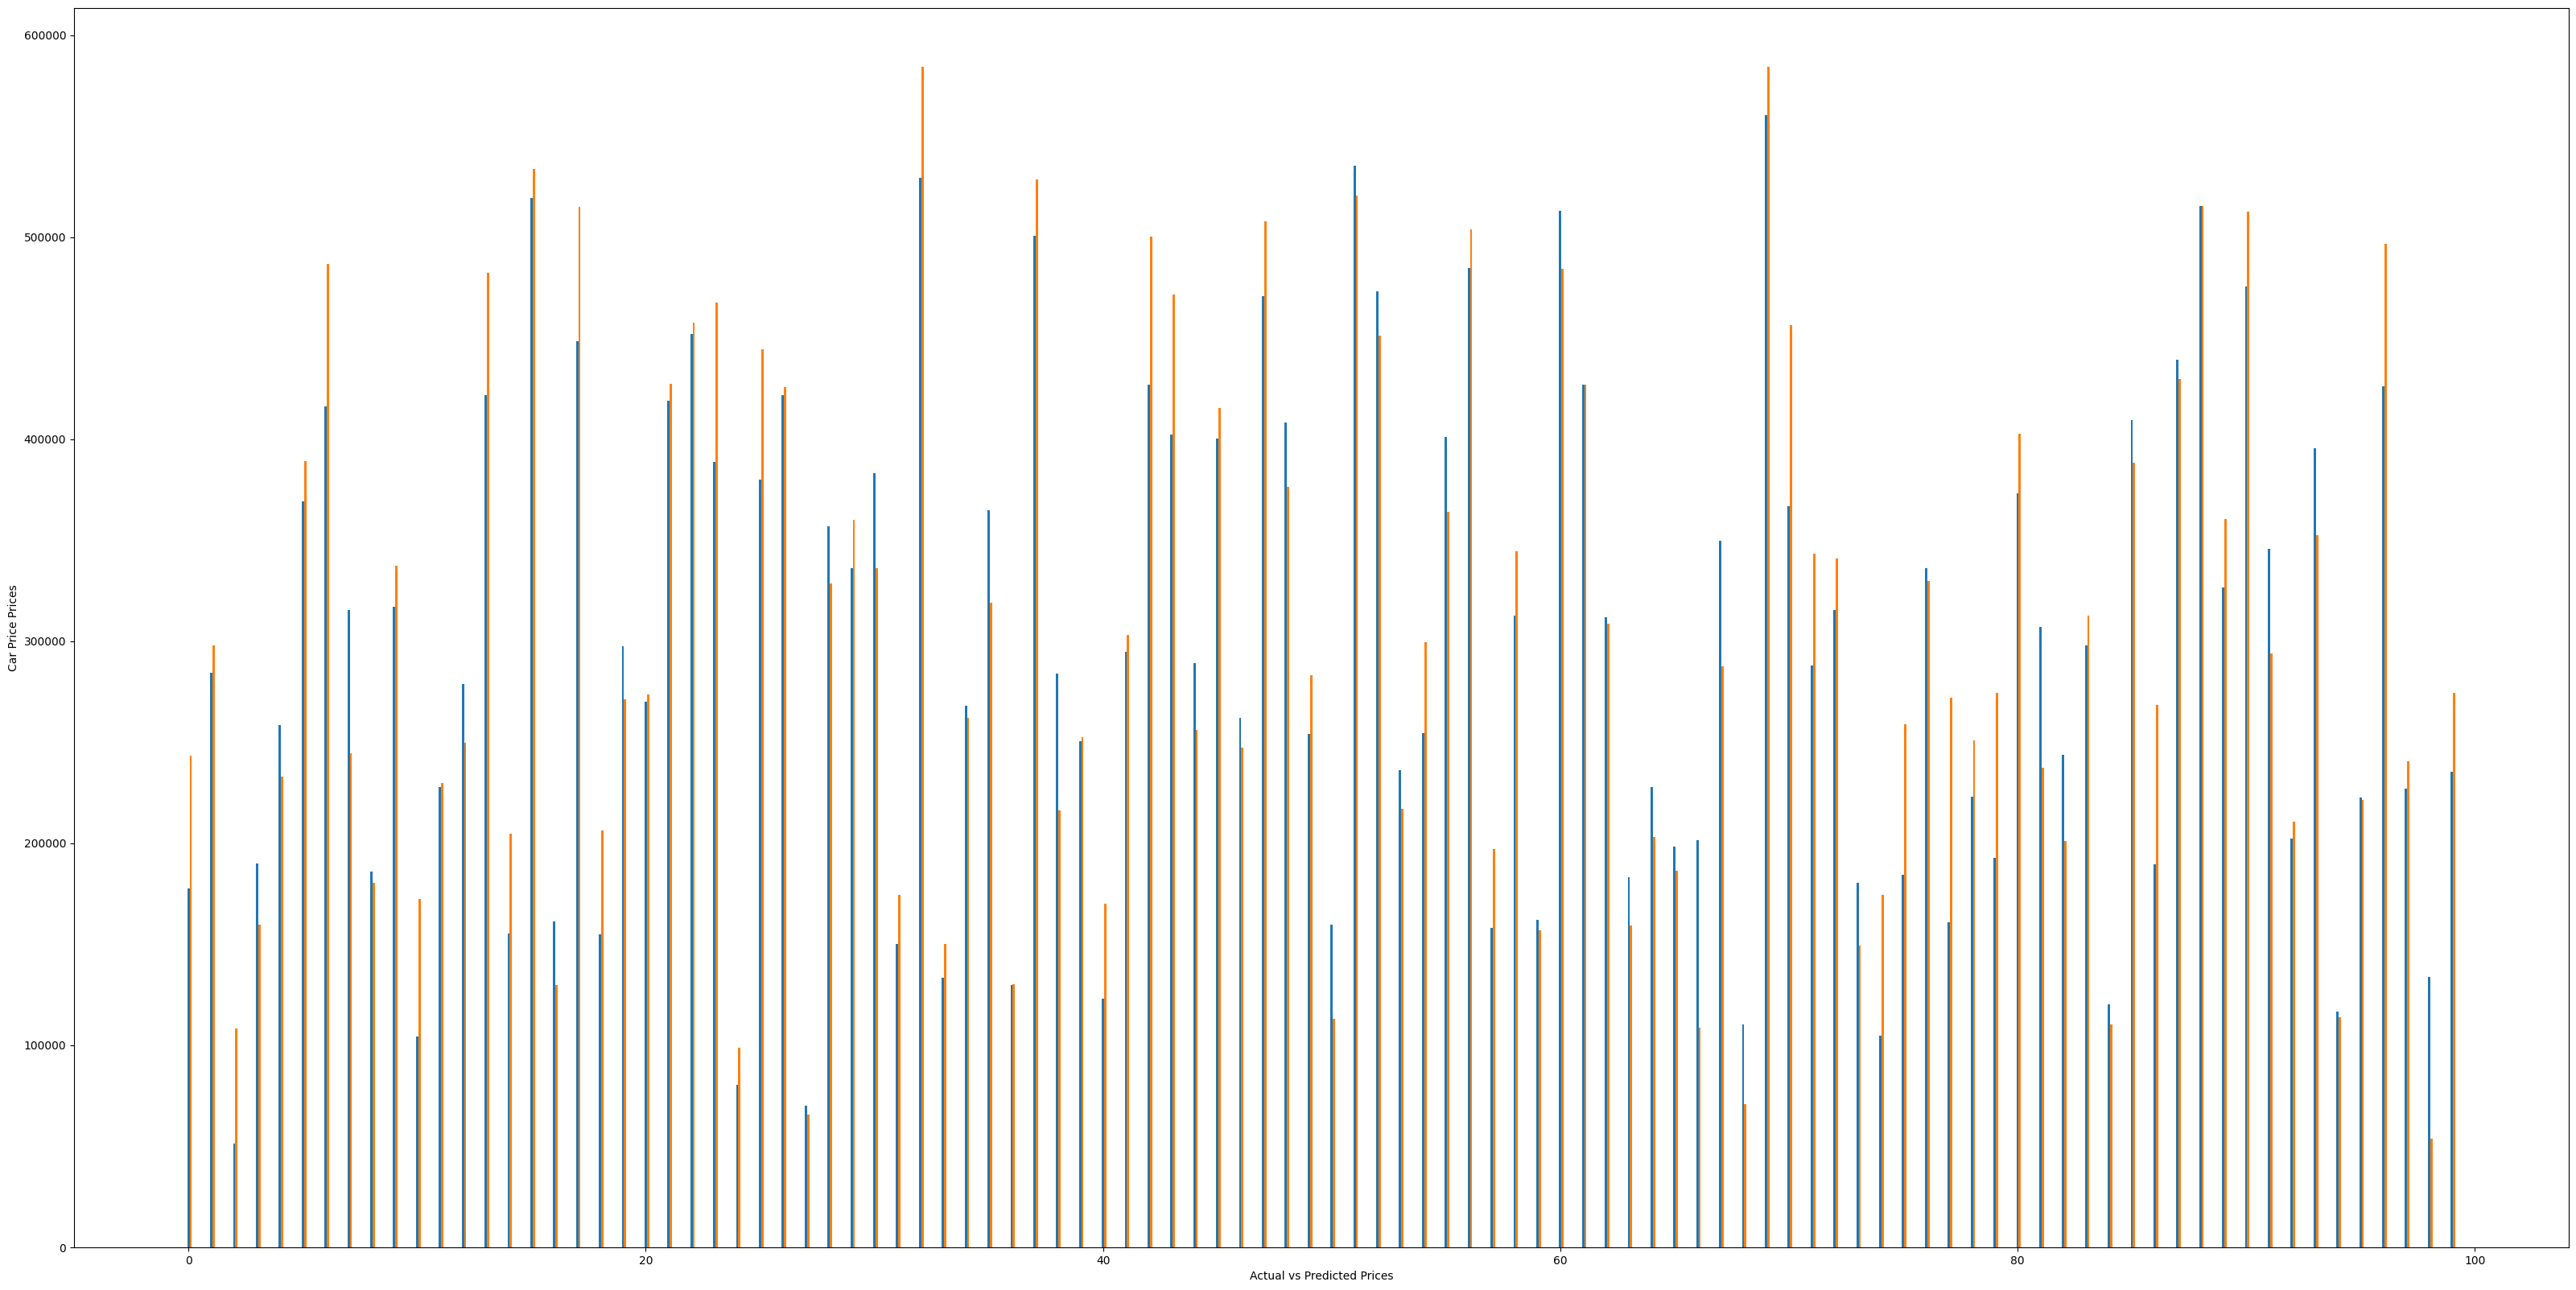

In [ ]:
ind = np.arange(100)
plt.figure(figsize=(40,20))
width = 0.1

plt.bar(ind, output_pred, width, label='Predicted Car Price')
plt.bar(ind + width, output_true, width, label='Actual Car Price')
plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Price Prices')
plt.show()

Model performs much better.

Another tool we can use is tf.data.Dataset to load our model faster, more efficiently and deal with big data. For 1000 elements, no advantage for using this API, however for large data we need this.

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((input_train, output_train))
#from tensor slices just takes the input training data and combines them in some way

train_dataset = train_dataset.shuffle(1000, reshuffle_each_iteration=True)

#We already shuffled but could've done it like this.
#The first input is the buffer size (how many elements we shuffle at a time)
#Take first 1000 as our sample then once we pick element we replace with next
#reshuffle_each_iteration reshuffles each time we pick element

train_dataset = train_dataset.batch(32) #BATCH SIZE

train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)

#So while one batch is being trained, the other is being fetched and prepared
#Reduces latency but requires more memory space

#The input is the buffer size, but can use autotune to dynamically auto choose

for x,y in train_dataset:
  print(x,y)
  break

tf.Tensor(
[[7.00000e+00 8.42840e+04 3.00000e+00 6.00000e+00 1.10000e+01 1.41000e+02
  1.05000e+02 7.40000e+01]
 [6.00000e+00 7.75700e+04 5.00000e+00 3.00000e+00 9.00000e+00 1.82000e+02
  1.09000e+02 7.90000e+01]
 [7.00000e+00 1.30004e+05 1.00000e+00 8.00000e+00 1.30000e+01 1.63000e+02
  5.20000e+01 9.70000e+01]
 [2.00000e+00 9.29880e+04 2.00000e+00 1.00000e+00 1.20000e+01 1.70000e+02
  9.90000e+01 9.80000e+01]
 [6.00000e+00 7.87830e+04 3.00000e+00 8.00000e+00 1.30000e+01 1.65000e+02
  8.90000e+01 7.00000e+01]
 [4.00000e+00 1.48138e+05 5.00000e+00 9.00000e+00 1.00000e+01 1.79000e+02
  9.50000e+01 8.10000e+01]
 [5.00000e+00 1.00534e+05 1.00000e+00 9.00000e+00 1.50000e+01 1.37000e+02
  7.20000e+01 1.19000e+02]
 [2.00000e+00 1.15874e+05 4.00000e+00 9.00000e+00 8.00000e+00 1.55000e+02
  5.10000e+01 1.19000e+02]
 [6.00000e+00 1.13621e+05 5.00000e+00 6.00000e+00 8.00000e+00 1.99000e+02
  9.50000e+01 1.09000e+02]
 [2.00000e+00 5.35730e+04 2.00000e+00 8.00000e+00 1.30000e+01 1.81000e+02
  1.20

In [ ]:
#Do same for the validation and testing data

val_dataset = tf.data.Dataset.from_tensor_slices((input_val, output_val))
val_dataset = val_dataset.shuffle(1000, reshuffle_each_iteration=True)
val_dataset = val_dataset.batch(32)
val_dataset = val_dataset.prefetch(tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((input_test, output_test))
test_dataset = test_dataset.shuffle(1000, reshuffle_each_iteration=True)
test_dataset = test_dataset.batch(32)
test_dataset = test_dataset.prefetch(tf.data.AUTOTUNE)

In [ ]:
history = model.fit(train_dataset, validation_data = val_dataset, epochs = 100, verbose = 1)

#Modify the order the things were run

#THIS ONLY SPEEDS UP THE MODEL DOESNT IMPROVE IT

Epoch 1/100
25/25 [==============================] - 1s 7ms/step - loss: 30774.6191 - root_mean_squared_error: 39443.0898 - val_loss: 36364.0508 - val_root_mean_squared_error: 44533.3477
Epoch 2/100
25/25 [==============================] - 0s 7ms/step - loss: 32524.1758 - root_mean_squared_error: 41258.4961 - val_loss: 36382.6758 - val_root_mean_squared_error: 43701.2734
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 30768.0273 - root_mean_squared_error: 39526.9102 - val_loss: 35055.4141 - val_root_mean_squared_error: 43220.6250
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 30960.7207 - root_mean_squared_error: 39028.6133 - val_loss: 38267.1836 - val_root_mean_squared_error: 47759.5664
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 34227.2422 - root_mean_squared_error: 43102.0352 - val_loss: 42778.0781 - val_root_mean_squared_error: 55113.1250
Epoch 6/100
25/25 [==============================] - 0s 6ms/step 